✅ Model loaded successfully (no warnings)
Found 2015 images belonging to 10 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


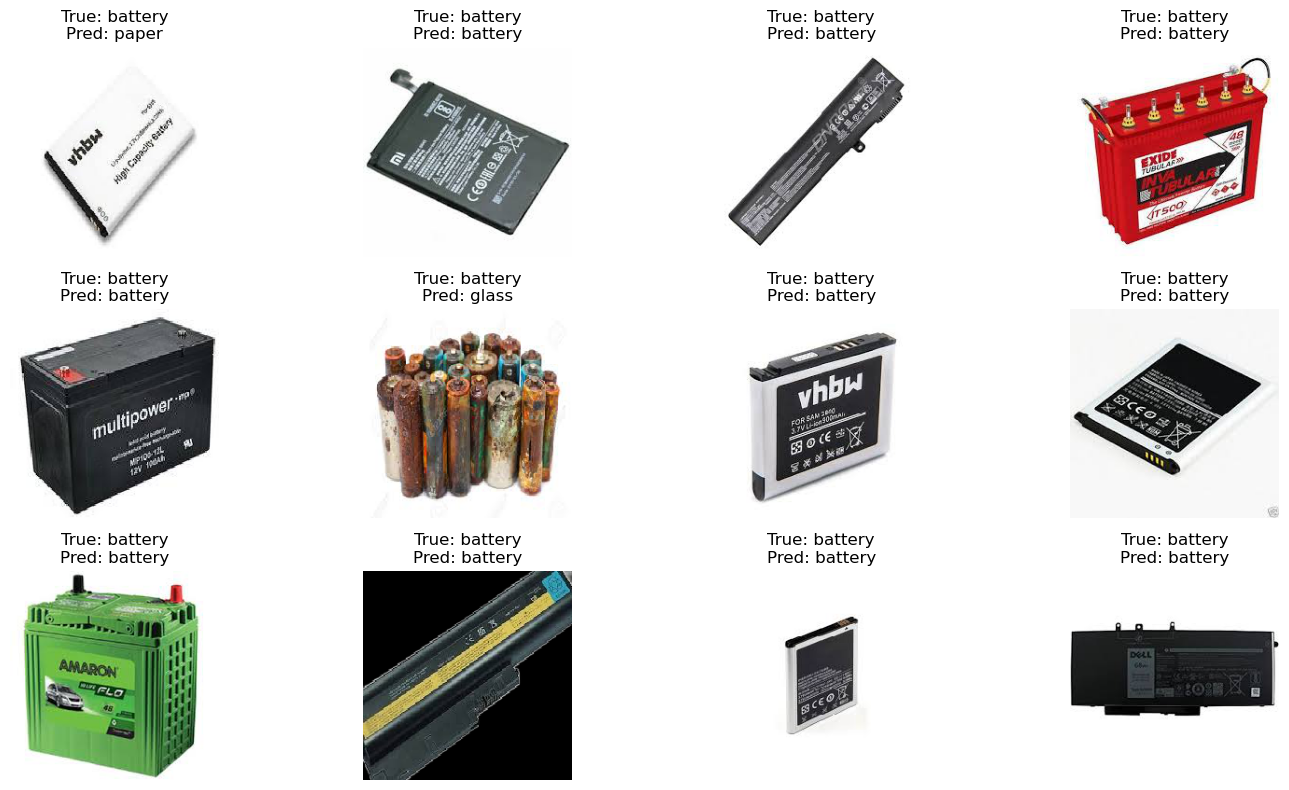

In [2]:
import warnings
warnings.filterwarnings("ignore")  # ⚡ Remove FutureWarnings

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------
# 1️⃣ Load Model for Inference
# ------------------------------
model = load_model("models/best_model.keras", compile=False)
print("✅ Model loaded successfully (no warnings)")

# ------------------------------
# 2️⃣ Prepare Test/Validation Data
# ------------------------------
test_dir = r"C:/Users/uthay/Desktop/cv-waste-classification/data/raw"

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1  # use 10% of data as validation/test
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # use validation split
    shuffle=False
)

# ------------------------------
# 3️⃣ Get Class Labels
# ------------------------------
class_labels = list(test_data.class_indices.keys())

# ------------------------------
# 4️⃣ Visualize Some Predictions
# ------------------------------
NUM_IMAGES = 12
images, labels = next(test_data)

preds = model.predict(images)
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(labels, axis=1)

plt.figure(figsize=(15, 8))
for i in range(NUM_IMAGES):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(f"True: {class_labels[true_classes[i]]}\nPred: {class_labels[pred_classes[i]]}")
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


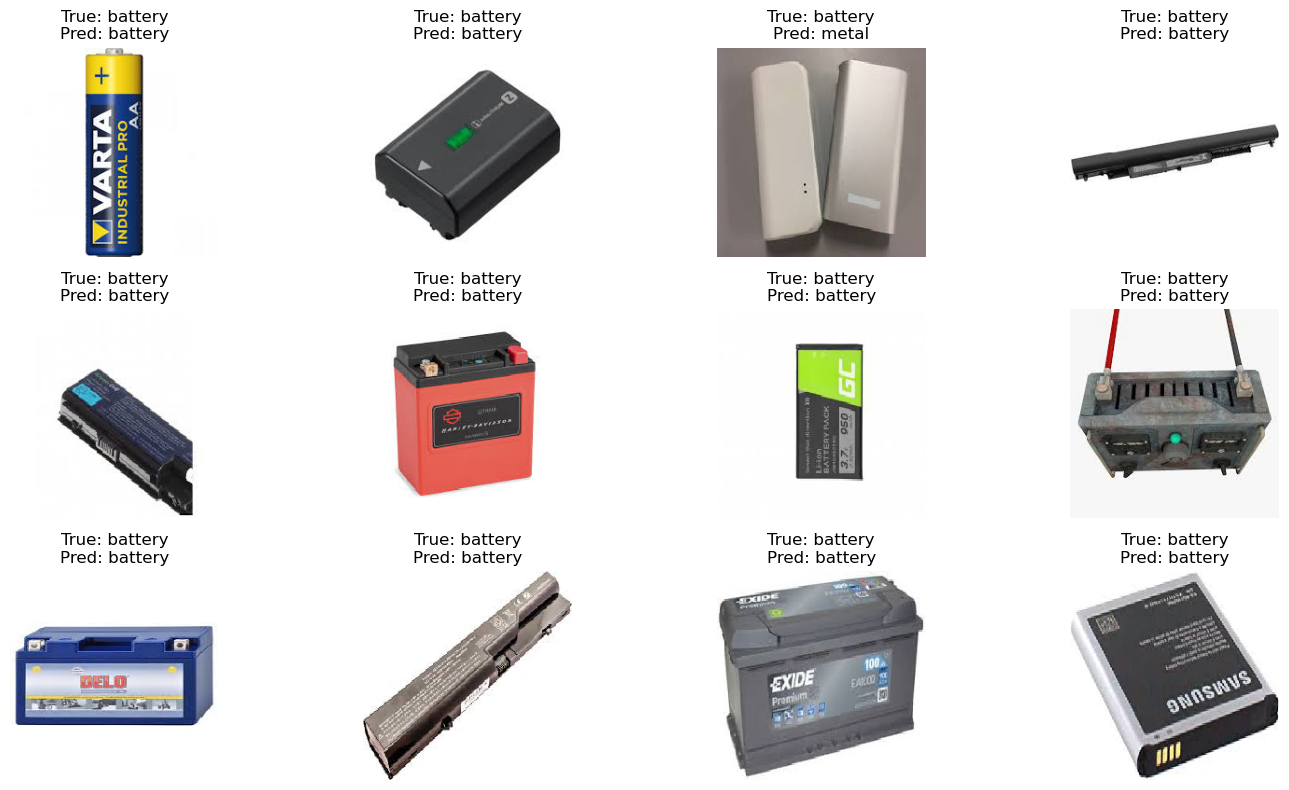

In [5]:
# ------------------------------
# 4️⃣ Visualize Some Predictions
# ------------------------------

NUM_IMAGES = 12

# Get a batch of images and labels
images, labels = next(test_data)

# Make predictions
preds = model.predict(images)
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(labels, axis=1)

# Plot images with True vs Predicted labels
plt.figure(figsize=(15, 8))
for i in range(NUM_IMAGES):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(f"True: {class_labels[true_classes[i]]}\nPred: {class_labels[pred_classes[i]]}")
plt.tight_layout()
plt.show()
